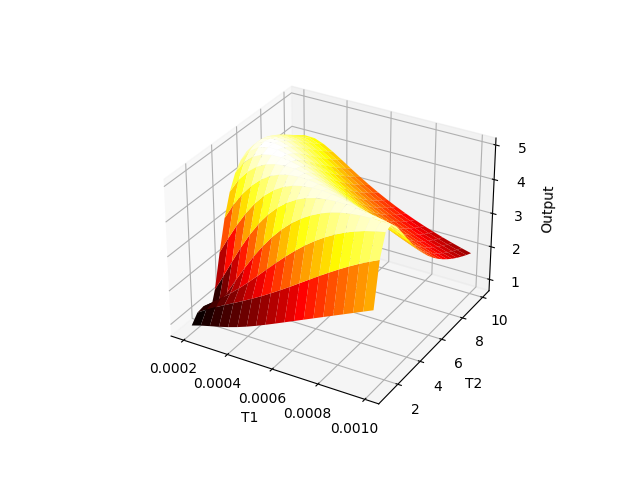

In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import sqrt, exp, cos, sin

plt.close('all')

m_l = 0.5 #mass to push off ground
k = 3000 #spring stiffness
tau_max = 0.05 #N*m stall torque
omega_max = 3000 #about 10,000rpm free speed

t = 0.2

x_a0, x_l0, v_l0 = (0,0,0)

def get_state(_T1, _T2):
    if(-_T1**4*k**2*m_l**2*omega_max**2*_T2**2 + 4*k*m_l*tau_max**2 > 0):
        x0 = omega_max**2
        x1 = m_l*x0
        x2 = 1/tau_max
        x3 = _T1**2
        x4 = _T2**2
        x5 = x2*x3*x4
        x6 = _T1*_T2*omega_max
        x7 = m_l*v_l0*x6 + tau_max*x_a0
        x8 = (1/2)*v_l0 - 1/2*x6
        x9 = 1/_T2
        x10 = sqrt(-_T1**4*k**2*m_l**2*x0*x4 + 4*k*m_l*tau_max**2)
        x11 = (1/2)*x2
        x12 = t*x10*x11*x9/m_l
        x13 = exp(-k*omega_max*t*x11*x3)
        x14 = x13*cos(x12)
        x15 = x14*x8
        x16 = 2*x15
        x17 = _T1**3*_T2**3*x1
        x18 = 2*_T1*_T2*tau_max*x_a0 + m_l*omega_max*v_l0*x3*x4 - 2*tau_max*x_l0 - x17
        x19 = sin(x12)
        x20 = x13*x19/x10
        x21 = x18*x20
        x22 = k*m_l*omega_max
        x23 = x11*x18
        x_a = -_T1*x2*x21*x22 - m_l*x16*x2*x6 + omega_max*t - x1*x5 + x2*x7
        x_l = _T1*_T2*omega_max*t + _T1*_T2*x2*x7 - _T2*x20*x22*x23*x3 + _T2*x10*x13*x19*x2*x8/k - m_l*omega_max*x15*x5 - x14*x23 - x17*x2
        v_l = k*x21*x9 + x16 + x6
    else:
        x0 = _T2**2
        x1 = omega_max**2
        x2 = x0*x1
        x3 = 1/tau_max
        x4 = _T1**2
        x5 = x3*x4
        x6 = m_l*x5
        x7 = tau_max*x_a0
        x8 = _T2*v_l0
        x9 = _T1*omega_max
        x10 = m_l*x9
        x11 = x10*x8 + x7
        x12 = 4*tau_max**2
        x13 = k*m_l
        x14 = _T1**4*x2
        x15 = sqrt(x13*(-x12 + x13*x14))
        x16 = 1/x15
        x17 = x0*x15*x9
        x18 = 2*k
        x19 = _T1**3*_T2**3*x1
        x20 = -_T1*_T2*x18*x7 - omega_max*v_l0*x0*x13*x4 + tau_max*x18*x_l0 + x13*x19
        x21 = (1/2)*k*omega_max*t*x5
        x22 = (1/2)/_T2
        x23 = sqrt(k**2*m_l**2*x14 - x12*x13)
        x24 = x23*x3
        x25 = t*x22*x24/m_l
        x26 = (_T2*v_l0*x15 - x17 - x20)*exp(-x21 + x25)
        x27 = x16*x26
        x28 = (1/2)*x10*x3
        x29 = x15*x8 - x17 + x20
        x30 = exp(-x21 - x25)
        x31 = x29*x30
        x32 = x16*x31
        x33 = (1/4)*x27
        x34 = _T2*omega_max*x6
        x35 = 1/k
        x36 = x16*x22
        x_a = omega_max*t + x11*x3 - x2*x6 - x27*x28 - x28*x32
        x_l = _T1*_T2*omega_max*t + _T1*_T2*x11*x3 - m_l*x19*x3 + (1/4)*x16*x23*x29*x3*x30*x35 - x24*x33*x35 - 1/4*x32*x34 - x33*x34
        v_l = _T2*x9 + x26*x36 + x31*x36

    return v_l

# Define the range of T1 and T2 values
T1_values = np.linspace(0.0002, 0.001, 20)
T2_values = np.linspace(1, 10, 20)

# Create a grid of T1 and T2 values
T1, T2 = np.meshgrid(T1_values, T2_values)

get_state_vec = np.vectorize(get_state)
Z = get_state_vec(T1, T2)

# Create the heatmap
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T1, T2, Z, cmap='hot')
ax.set_xlabel('T1')
ax.set_ylabel('T2')
ax.set_zlabel('Output')
plt.show()


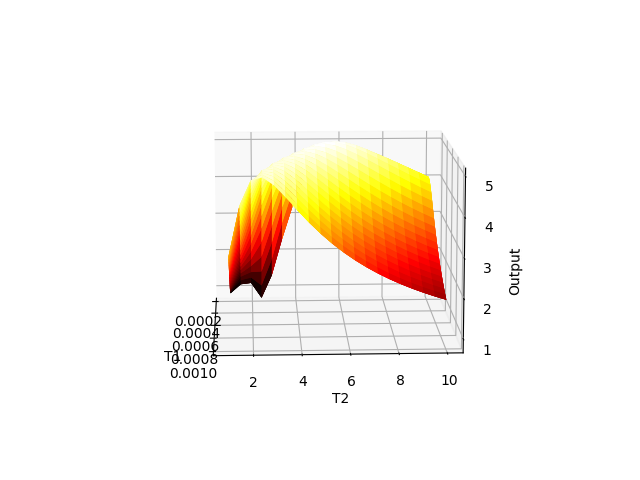

In [104]:
T1 = 1e-6
T2 = 1e-6

def f(X):
    c1 = -k * T1**2 * omega_max / tau_max
    c2 = k * T1 * omega_max / (tau_max * T2)
    c3 = k * T1 / (T2 * m_l)
    c4 = -k / (T2**2 * m_l)

    # Xdot = A*X where X = [x_a, x_l, x_l_dot]
    A = np.array([
        [c1, c2, 0],
        [0, 0, 1],
        [c3, c4, 0],
    ])
    b = [omega_max, 0, 0]

    X = np.array(X).reshape(3)
    return A@X + b

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1 = f(X)
    k2 = f(X + (dt/2)*k1)
    k3 = f(X + (dt/2)*k2)
    k4 = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)


def get_state_rk4(_T1, _T2):
    X = np.array([0, 0, 0])

    dt = 0.01

    global T1, T2

    T1 = _T1
    T2 = _T2
    for ti in np.arange(0, 0.2, dt):
        X = RK4(f, X, dt)
    return X[2]


# Define the range of T1 and T2 values
T1_values = np.linspace(0.0002, 0.001, 20)
T2_values = np.linspace(1, 10, 20)

# Create a grid of T1 and T2 values
T1_grid, T2_grid = np.meshgrid(T1_values, T2_values)

get_state_vec_rk4 = np.vectorize(get_state_rk4)
Z_rk4 = get_state_vec_rk4(T1_grid, T2_grid)

# Create the heatmap
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T1_grid, T2_grid, Z, cmap='hot')
ax.set_xlabel('T1')
ax.set_ylabel('T2')
ax.set_zlabel('Output')
plt.show()